In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("data/raw_data.csv")
dataset.head()

,car_name,Year,fuel_type,transmission,owner,Selling Price
0,Jeep Compass 2.0 Longitude Option BSIV,2017,Diesel,Manual,1,10.03
1,Renault Duster RXZ Turbo CVT,2021,Petrol,Automatic,1,12.83
2,Toyota Camry 2.5 G,2016,Petrol,Automatic,1,16.40
3,Honda Jazz VX CVT,2018,Petrol,Automatic,1,7.77
4,Volkswagen Polo 1.2 MPI Highline,2016,Petrol,Manual,1,5.15


In [4]:
dataset.isnull().sum()

car_name         0
Year             0
fuel_type        0
transmission     0
owner            0
Selling Price    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       5512 non-null   object 
 1   Year           5512 non-null   int64  
 2   fuel_type      5512 non-null   object 
 3   transmission   5512 non-null   object 
 4   owner          5512 non-null   int64  
 5   Selling Price  5512 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 258.5+ KB


In [6]:
dataset.describe()

,Year,owner,Selling Price
count,5512.000000,5512.000000,5512.000000
mean,2015.455552,1.421807,1700.984784
std,3.927974,0.703092,11471.329530
min,1995.000000,0.000000,1.000000
25%,2013.000000,1.000000,3.250000
50%,2016.000000,1.000000,5.640000
75%,2018.000000,2.000000,10.892500
max,2022.000000,5.000000,99999.000000


# Feature Enginnering

In [7]:
print("Categories in 'car_name' variable:     ",end=" " )
print(dataset['car_name'].unique())

print("Categories in 'fuel_type' variable:  ",end=" ")
print(dataset['fuel_type'].unique())

print("Categories in'transmission' variable:",end=" " )
print(dataset['transmission'].unique())



Categories in 'car_name' variable:      ['Jeep Compass 2.0 Longitude Option BSIV' 'Renault Duster RXZ Turbo CVT'
 'Toyota Camry 2.5 G' ... 'Volvo XC 90 D5 Momentum BSIV'
 'Mercedes-Benz E-Class E250 Edition E' 'BMW M Series M4 Coupe']
Categories in 'fuel_type' variable:   ['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
Categories in'transmission' variable: ['Manual' 'Automatic']


In [36]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['car_name', 'Year', 'fuel_type', 'transmission', 'owner', 'Selling Price']

We have 0 categorical features : []


In [11]:
# Label-encoding(car_name)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
car_name_lb = LabelEncoder()
dataset['car_name']=car_name_lb.fit_transform(dataset['car_name'])


In [14]:
# Label-encoding(fuel_type)

In [15]:
fuel_type_lb = LabelEncoder()
dataset['fuel_type']=fuel_type_lb.fit_transform(dataset['fuel_type'])

In [16]:
# Label-encoding(transmission)

In [17]:
transmission_lb = LabelEncoder()
dataset['transmission']=transmission_lb.fit_transform(dataset['transmission'])

In [18]:
dataset.head()

,car_name,Year,fuel_type,transmission,owner,Selling Price
0,743,2017,1,1,1,10.03
1,1444,2021,4,0,1,12.83
2,1706,2016,4,0,1,16.40
3,385,2018,4,0,1,7.77
4,1831,2016,4,1,1,5.15


<Axes: >

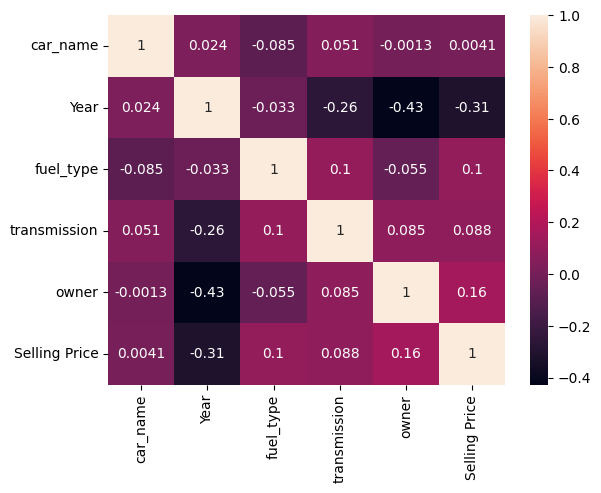

In [19]:
sns.heatmap(dataset.corr(),annot=True)

In [20]:
#input and output

In [21]:
input=dataset.iloc[:,:-1]
output= dataset['Selling Price']

# Standard Scalling

In [22]:
# input scaling

In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [24]:
ss = StandardScaler()
input = pd.DataFrame(ss.fit_transform(input),columns=input.columns)

In [25]:
input

,car_name,Year,fuel_type,transmission,owner
0,-0.336744,0.393228,-1.068243,0.625473,-0.599986
1,1.020841,1.411657,0.918538,-1.598790,-0.599986
2,1.528240,0.138621,0.918538,-1.598790,-0.599986
3,-1.030061,0.647835,0.918538,-1.598790,-0.599986
4,1.770320,0.138621,0.918538,0.625473,-0.599986
...,...,...,...,...,...
5507,-1.616862,0.647835,-1.068243,-1.598790,-0.599986
5508,-1.622672,-0.115987,0.918538,-1.598790,0.822432
5509,-0.381286,-0.625201,-1.068243,-1.598790,0.822432
5510,-1.632356,-0.115987,-1.068243,-1.598790,2.244850


In [26]:
# tain test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(input,output,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score , mean_squared_error

In [30]:
def compare_regression_models(X_train, X_test, y_train, y_test):
    """
    Compare multiple regression models using pre-split data.
    """
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'ElasticNet': ElasticNet(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'SVR': SVR(),
        'KNN': KNeighborsRegressor()
    }

    results = []

    for name, model in models.items():
        try:
            # Train and predict
            model.fit(X_train_scaled, y_train)
            train_pred = model.predict(X_train_scaled)
            test_pred = model.predict(X_test_scaled)

            # Calculate metrics
            train_r2 = r2_score(y_train, train_pred)
            test_r2 = r2_score(y_test, test_pred)
            train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
            test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

            # Use model's built-in score method for accuracy
            train_score = model.score(X_train_scaled, y_train) * 100
            test_score = model.score(X_test_scaled, y_test) * 100

            results.append({
                'Model': name,
                'Train Score (%)': train_score,
                'Test Score (%)': test_score,
                'Train R2': train_r2,
                'Test R2': test_r2,
                'Train RMSE': train_rmse,
                'Test RMSE': test_rmse
            })

        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue

    results_df = pd.DataFrame(results)
    return results_df.sort_values('Test Score (%)', ascending=False)

# Use this function with your existing splits
results = compare_regression_models(X_train, X_test, y_train, y_test)

# Print results
print("\nModel Comparison Results:")
print("=" * 100)
print(f"Best performing model: {results.iloc[0]['Model']}")
print(f"Best Test Score: {results.iloc[0]['Test Score (%)']:.2f}%")
print(f"Best R2 score (test): {results.iloc[0]['Test R2']:.4f}")
print("\nDetailed Results:")
print("-" * 100)
print(results.to_string(index=False, float_format=lambda x: '{:.2f}'.format(x)))
print("=" * 100)


Model Comparison Results:
Best performing model: Random Forest
Best Test Score: 57.21%
Best R2 score (test): 0.5721

Detailed Results:
----------------------------------------------------------------------------------------------------
            Model  Train Score (%)  Test Score (%)  Train R2  Test R2  Train RMSE  Test RMSE
    Random Forest            85.93           57.21      0.86     0.57     4355.27    7119.29
              KNN            43.07           24.20      0.43     0.24     8761.97    9475.44
            Lasso            11.13            8.81      0.11     0.09    10947.10   10393.38
            Ridge            11.13            8.80      0.11     0.09    10947.10   10393.45
Linear Regression            11.13            8.80      0.11     0.09    10947.10   10393.48
       ElasticNet            10.08            8.41      0.10     0.08    11011.15   10415.85
    Decision Tree            94.86            4.05      0.95     0.04     2632.83   10660.82
              SVR  

In [38]:
random = RandomForestRegressor()
random = random.fit(X_train, y_train)
y_pred = random.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 56.45


<Axes: xlabel='Selling Price', ylabel='Predicted Price'>

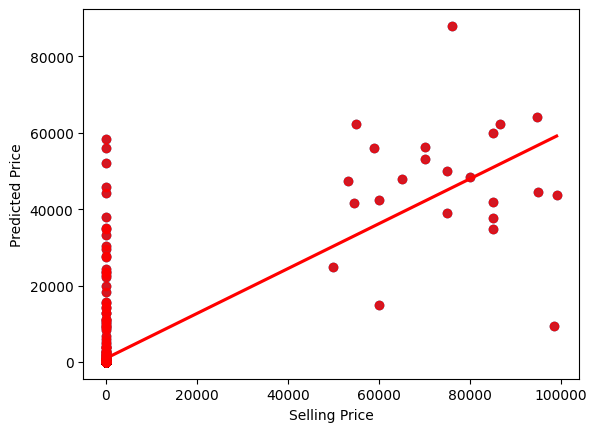

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')   
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [41]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
5245,42.00,19.881500,22.118500
3558,2.79,7.127600,-4.337600
405,27.25,19.279430,7.970570
4446,4.00,1107.788620,-1103.788620
142,7.25,8.228508,-0.978508
...,...,...,...
726,6.75,12.383500,-5.633500
3772,6.25,5.727968,0.522032
3508,17.77,17.304285,0.465715
1800,16.00,12.944767,3.055233
